# Task 1
###  Develop a classifier to differentiate between natural and human fire causes, so a binary classifcation. Part a aims at finding the best classifier you can, part b at finding a classifier that also works well, but is interpretable.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## CLASSIFICATION PACKAGES ##
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

### First we'll try some predictions with region as a variable within the classifier

In [23]:
df = pd.read_csv('task3df.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)

X = df[[
    'fm.mean', 'Wind.mean', 'LATITUDE', 'LONGITUDE', 'DISCOVERY_DOY',
    'FIRE_YEAR', 'cont_time', 'PROJECTED_FINAL_IM_COST', 'ACRES',
    'TOTAL_PERSONNEL', 'STR_DAMAGED', 'WF_FSR', 'FATALITIES', 'FIRE_SIZE',
    'eco1_10  NORTH AMERICAN DESERTS', 'eco1_11  MEDITERRANEAN CALIFORNIA',
    'eco1_12  SOUTHERN SEMIARID HIGHLANDS', 'eco1_13  TEMPERATE SIERRAS',
    'eco1_15  TROPICAL WET FORESTS', 'eco1_2  TUNDRA', 'eco1_3  TAIGA',
    'eco1_5  NORTHERN FORESTS', 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS',
    'eco1_7  MARINE WEST COAST FOREST', 'eco1_8  EASTERN TEMPERATE FORESTS',
    'eco1_9  GREAT PLAINS', 'FUEL_MODEL_Brush (2 feet)',
    'FUEL_MODEL_Chaparral (6 feet)', 'FUEL_MODEL_Closed Timber Litter',
    'FUEL_MODEL_Dormant Brush, Hardwood Slash',
    'FUEL_MODEL_Hardwood Litter', 'FUEL_MODEL_Heavy Logging Slash',
    'FUEL_MODEL_Light Logging Slash', 'FUEL_MODEL_Medium Logging Slash',
    'FUEL_MODEL_Short Grass (1 foot)', 'FUEL_MODEL_Southern Rough',
    'FUEL_MODEL_Tall Grass (2.5 feet)',
    'FUEL_MODEL_Timber (Grass and Understory)',
    'FUEL_MODEL_Timber (Litter and Understory)', 'GROWTH_POTENTIAL_Extreme',
    'GROWTH_POTENTIAL_High', 'GROWTH_POTENTIAL_Low',
    'GROWTH_POTENTIAL_Medium', 'TERRAIN_Extreme', 'TERRAIN_High',
    'TERRAIN_Low', 'TERRAIN_Medium', 'FIRE_SIZE_CLASS_A',
    'FIRE_SIZE_CLASS_B', 'FIRE_SIZE_CLASS_C', 'FIRE_SIZE_CLASS_D',
    'FIRE_SIZE_CLASS_E', 'FIRE_SIZE_CLASS_F', 'FIRE_SIZE_CLASS_G'
    ]].copy()

# 1 = caused by lightning
# 0 = caused by humans
y = df[['STAT_CAUSE_DESCR_Lightning']].copy()

In [24]:
y.sum() / y.shape[0]

STAT_CAUSE_DESCR_Lightning    0.797885
dtype: float64

## Part (a) - No Interpretation

In [25]:
def per_class_acc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    per_class_acc = cm.diagonal()
    
    return per_class_acc[0], per_class_acc[1]
    
    
print("==================")
print("=== No Scaling ===")
print("==================")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== AdaBoost ===")
abc = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
y_pred = abc.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {abc.score(X_test, y_test)}")

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {rf.score(X_test, y_test)}")

print("\n=== Logistic Regression ===")
lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {knn.score(X_test, y_test)}")

print("\n=== Support Vector Classifier ===")
svm = LinearSVC().fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {svm.score(X_test, y_test)}")

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {dtc.score(X_test, y_test)}")

print("====================")
print("=== With Scaling ===")
print("====================")
    
# Scale continuous variables
scaler = StandardScaler()
X.loc[:,X.columns[0:14]] = scaler.fit_transform(X[(X.columns[0:14])])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print("\n=== AdaBoost ===")
abc = AdaBoostClassifier().fit(X_train, y_train.values.ravel())
y_pred = abc.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {abc.score(X_test, y_test)}")

print("\n=== Random Forest ===")
rf = RandomForestClassifier().fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {rf.score(X_test, y_test)}")

print("\n=== Logistic Regression ===")
lr = LogisticRegressionCV().fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

print("\n=== K Nearest Neighbours ===")
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {knn.score(X_test, y_test)}")

print("\n=== Support Vector Classifier ===")
svm = LinearSVC().fit(X_train, y_train.values.ravel())
y_pred = svm.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {svm.score(X_test, y_test)}")

print("\n=== Decision Tree Classifier ===")
dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {dtc.score(X_test, y_test)}")

=== No Scaling ===

=== AdaBoost ===
Per class acc: (0.5747914183551848, 0.9632515066882258)
Total acc: 0.8863931140195732

=== Random Forest ===
Per class acc: (0.9856972586412396, 0.9980155813611642)
Total acc: 0.99557835160948

=== Logistic Regression ===


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/s

Per class acc: (0.007449344457687724, 0.994781713949728)
Total acc: 0.7994340290060135

=== K Nearest Neighbours ===
Per class acc: (0.5178784266984505, 0.9321622813464648)
Total acc: 0.8501945525291829

=== Support Vector Classifier ===


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Per class acc: (0.17818831942789035, 0.9850066147287961)
Total acc: 0.8253743662303974

=== Decision Tree Classifier ===
Per class acc: (0.9839094159713945, 0.996251653682199)
Total acc: 0.993809692253272
=== With Scaling ===

=== AdaBoost ===
Per class acc: (0.5747914183551848, 0.9632515066882258)
Total acc: 0.8863931140195732

=== Random Forest ===
Per class acc: (0.9862932061978545, 0.9977950904012935)
Total acc: 0.9955193962976064

=== Logistic Regression ===
Per class acc: (0.5122169249106079, 0.9521534617080699)
Total acc: 0.8651102464332037

=== K Nearest Neighbours ===
Per class acc: (0.9091179976162098, 0.9874320152873732)
Total acc: 0.9719372715481664

=== Support Vector Classifier ===


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Per class acc: (0.5050655542312277, 0.9562692929589887)
Total acc: 0.8669968164131588

=== Decision Tree Classifier ===
Per class acc: (0.9848033373063171, 0.9963251506688225)
Total acc: 0.9940455135007664


In [26]:
impt = rf.feature_importances_
rf_feat_impt = {}
for i, v in enumerate(impt):
    rf_feat_impt[X.columns[i]] = v
    
rf_feat_impt = dict(sorted(rf_feat_impt.items(), key=lambda item: item[1], reverse=True))
rf_feat_impt

{'DISCOVERY_DOY': 0.14872743061611474,
 'LATITUDE': 0.13030025657267114,
 'LONGITUDE': 0.09650632511682695,
 'FIRE_SIZE': 0.07335417735520926,
 'cont_time': 0.0722273377781035,
 'ACRES': 0.050827675084210745,
 'FIRE_YEAR': 0.04758829658050727,
 'PROJECTED_FINAL_IM_COST': 0.03976842001861109,
 'Wind.mean': 0.0373836972073418,
 'eco1_6  NORTHWESTERN FORESTED MOUNTAINS': 0.03607692650565654,
 'TOTAL_PERSONNEL': 0.03187234298472996,
 'fm.mean': 0.029206068449250902,
 'STR_DAMAGED': 0.019428933046709593,
 'eco1_11  MEDITERRANEAN CALIFORNIA': 0.016228753952864456,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.015726919101139655,
 'WF_FSR': 0.010310005995092799,
 'FUEL_MODEL_Chaparral (6 feet)': 0.009763074923690739,
 'eco1_8  EASTERN TEMPERATE FORESTS': 0.00934300803592023,
 'TERRAIN_Extreme': 0.008066772147454677,
 'TERRAIN_High': 0.00796593871851698,
 'TERRAIN_Medium': 0.007840418059329243,
 'FIRE_SIZE_CLASS_G': 0.007533250128938821,
 'GROWTH_POTENTIAL_Low': 0.007336113916566583,
 'FUEL_

## Part (b) - Includes model interpretation

### Decision Tree

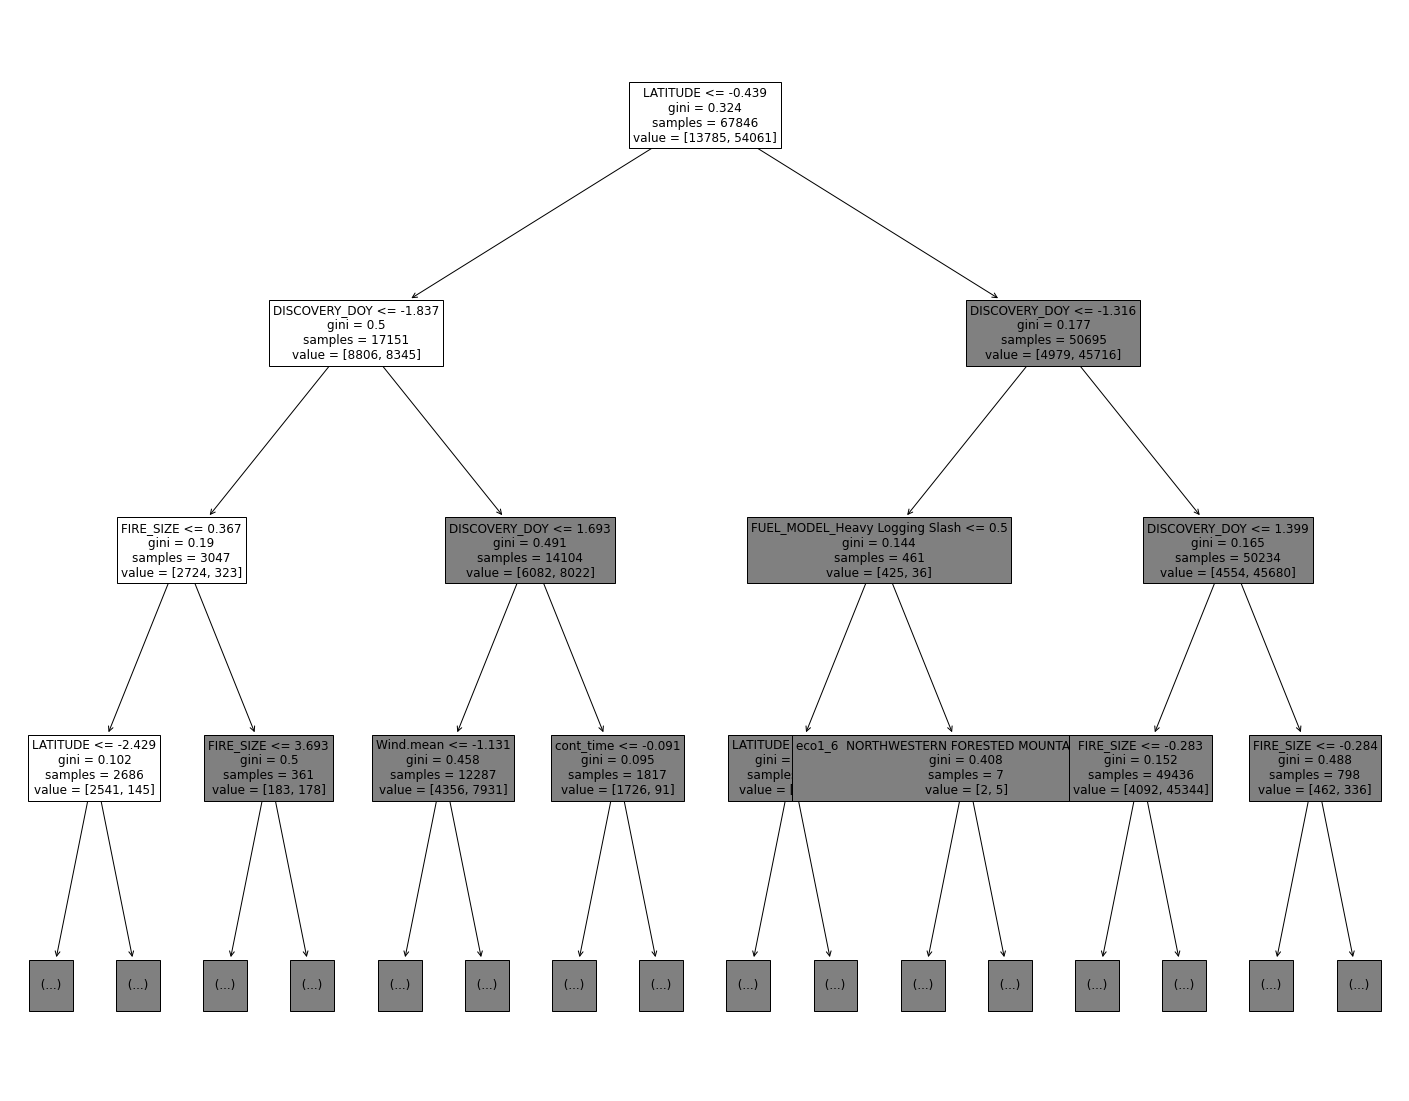

In [27]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, max_depth=3, feature_names=X.columns, fontsize=12)

In [28]:
impt = dtc.feature_importances_
dtc_feat_impt = {}
for i, v in enumerate(impt):
    dtc_feat_impt[X.columns[i]] = v
    
dtc_feat_impt = dict(sorted(dtc_feat_impt.items(), key=lambda item: item[1], reverse=True))
dtc_feat_impt

{'LATITUDE': 0.29667160295098893,
 'DISCOVERY_DOY': 0.2339720213020871,
 'FIRE_SIZE': 0.08253938300727094,
 'cont_time': 0.0810067594272368,
 'LONGITUDE': 0.07366285573142158,
 'FIRE_YEAR': 0.041505407136972296,
 'Wind.mean': 0.036154485969765435,
 'ACRES': 0.03059763088979441,
 'STR_DAMAGED': 0.019751801953025633,
 'fm.mean': 0.013836863241524278,
 'PROJECTED_FINAL_IM_COST': 0.013812166711233932,
 'FUEL_MODEL_Southern Rough': 0.00843862756866158,
 'TOTAL_PERSONNEL': 0.005790332650993424,
 'TERRAIN_High': 0.00565303869689981,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.004919173077021073,
 'FUEL_MODEL_Medium Logging Slash': 0.004217041521530215,
 'FIRE_SIZE_CLASS_F': 0.0035421282500902457,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.0034884101937374228,
 'TERRAIN_Extreme': 0.0032827331258198657,
 'FIRE_SIZE_CLASS_G': 0.00316578959432695,
 'FUEL_MODEL_Heavy Logging Slash': 0.002987594701522553,
 'FUEL_MODEL_Dormant Brush, Hardwood Slash': 0.0029053660368656637,
 'FUEL_MODEL_Brush

### Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


print("\n=== Feature var > .2 ===")
lr = LogisticRegressionCV(penalty='l2').fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

In [36]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=.2)
X_new = sel.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=13)


print("\n=== Feature var > .2 ===")
lr = LogisticRegressionCV(penalty='l2').fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")


=== Feature var > .2 ===
Per class acc: (0.4353396901072706, 0.9522269586946935)
Total acc: 0.8499587312816885


In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

for i in range(1, 25):
    
    X_new = X.copy()
    X_new[X_new<0] = 0
    X_new.min()
    
    transformer = GenericUnivariateSelect(chi2, mode='k_best', param=i)
    X_new = transformer.fit_transform(X_new, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=13)

    print(f"\n=== k = {i} ===")
    lr = LogisticRegressionCV(penalty='l2').fit(X_train, y_train.values.ravel())
    y_pred = lr.predict(X_test)
    acc_0, acc_1 = per_class_acc(y_test, y_pred)
    print(f"Per class acc: ({acc_0}, {acc_1})")
    print(f"Total acc: {lr.score(X_test, y_test)}")

In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

c_vals = [0.0005, 0.001, 0.01, 0.1, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


for c in c_vals:
        
    print(f"\n=== c = {c} ===")
    lr = LogisticRegression(penalty='l1', solver='saga', C=c, max_iter=500).fit(X_train, y_train.values.ravel())
    model = SelectFromModel(lr, prefit=True)
    Xtrain_new = model.transform(X_train)
    Xtest_new = model.transform(X_test)
    
    lr = LogisticRegressionCV(penalty='l2', max_iter=500).fit(Xtrain_new, y_train.values.ravel())
    y_pred = lr.predict(Xtest_new)
    acc_0, acc_1 = per_class_acc(y_test, y_pred)
    print(f"Per class acc: ({acc_0}, {acc_1})")
    print(f"Total acc: {lr.score(Xtest_new, y_test)}")


=== c = 0.0005 ===
Per class acc: (0.39779499404052443, 0.9511245038953403)
Total acc: 0.8416460323075109

=== c = 0.001 ===
Per class acc: (0.43921334922526817, 0.9504630310157284)
Total acc: 0.8493102228510789

=== c = 0.01 ===
Per class acc: (0.5116209773539928, 0.9547993532265178)
Total acc: 0.8671147270369061

=== c = 0.1 ===


/home/sreisig/anaconda3/envs/math561/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Per class acc: (0.5122169249106079, 0.9522269586946935)
Total acc: 0.8651692017450773

=== c = 1 ===
Per class acc: (0.5122169249106079, 0.9521534617080699)
Total acc: 0.8651102464332037

=== c = 3 ===
Per class acc: (0.5125148986889154, 0.9521534617080699)
Total acc: 0.8651692017450773


In [87]:
lr = LogisticRegressionCV(class_weight='balanced').fit(X_train, y_train.values.ravel())
y_pred = lr.predict(X_test)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test, y_test)}")

Per class acc: (0.7941001191895113, 0.8150080846685286)
Total acc: 0.8108713595094919


In [85]:
X_train_new = X_train.drop(columns=['DISCOVERY_DOY'])
X_test_new = X_test.drop(columns=['DISCOVERY_DOY'])
lr = LogisticRegressionCV(class_weight='balanced').fit(X_train_new, y_train.values.ravel())
y_pred = lr.predict(X_test_new)
acc_0, acc_1 = per_class_acc(y_test, y_pred)
print(f"Per class acc: ({acc_0}, {acc_1})")
print(f"Total acc: {lr.score(X_test_new, y_test)}")

Per class acc: (0.8009535160905841, 0.8129501690430693)
Total acc: 0.8105765829501238


In [86]:
coef = lr.coef_
lr_coef = {}
for i, v in enumerate(coef[0]):
    lr_coef[X.columns[i]] = v
    
lr_coef = dict(sorted(lr_coef.items(), key=lambda item: item[1], reverse=True))
lr_coef

{'TERRAIN_Medium': 1.3635637409848218,
 'FUEL_MODEL_Short Grass (1 foot)': 1.1619221959776524,
 'FIRE_SIZE_CLASS_A': 1.080159686365698,
 'eco1_13  TEMPERATE SIERRAS': 0.8745970222306269,
 'eco1_12  SOUTHERN SEMIARID HIGHLANDS': 0.864004812439471,
 'FIRE_SIZE': 0.7838089799830137,
 'FIRE_YEAR': 0.7646136875568409,
 'FIRE_SIZE_CLASS_B': 0.6154097057502579,
 'FUEL_MODEL_Tall Grass (2.5 feet)': 0.5517698140125452,
 'PROJECTED_FINAL_IM_COST': 0.534201727256256,
 'FUEL_MODEL_Medium Logging Slash': 0.47681730442491577,
 'FUEL_MODEL_Timber (Litter and Understory)': 0.4354115793325596,
 'eco1_9  GREAT PLAINS': 0.4217750871816477,
 'FUEL_MODEL_Timber (Grass and Understory)': 0.3753847101594232,
 'FUEL_MODEL_Chaparral (6 feet)': 0.3375265435541439,
 'cont_time': 0.3303778058408809,
 'eco1_5  NORTHERN FORESTS': 0.2905288948253743,
 'GROWTH_POTENTIAL_Medium': 0.27054454066756944,
 'GROWTH_POTENTIAL_Extreme': 0.25646239866854026,
 'LATITUDE': 0.2358471748856564,
 'eco1_8  EASTERN TEMPERATE FORESTS':